Import Statements

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import cauchy
from iminuit import cost,Minuit

Dataset

In [2]:
mass = [7.95442531,10.60408232,9.9020277,10.42288788,17.2193401,10.06076572,10.00176003,7.8289388,9.55481385,9.99981543,10.3156156,10.70547087,9.80374407,
    7.62085689,9.60747351,]

## Visualization

[]

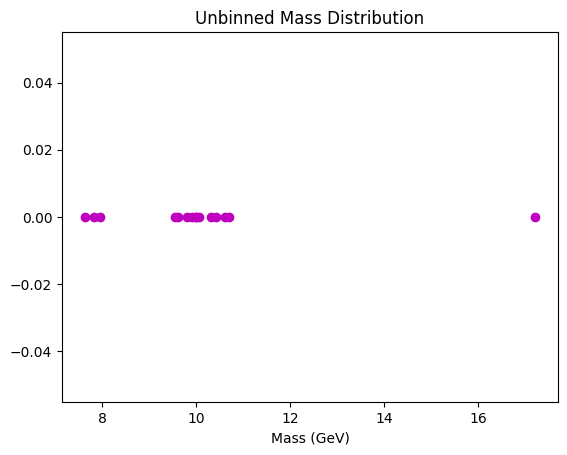

In [4]:
zero = np.zeros(len(mass)) #y value of 0 since the histogram is unbinned
plt.scatter(mass,zero,color = 'm')
plt.xlabel('Mass (GeV)')
plt.title('Unbinned Mass Distribution')
plt.plot()

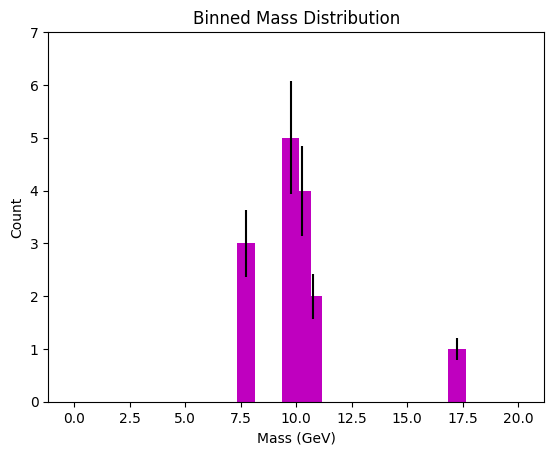

In [5]:
m,edge = np.histogram(mass,40,(0,20))
centers = 0.5 * (edge[1:] + edge[:-1]) #calculating center of each histogram bin
error = np.std(mass) #calculating error as standard deviation of masses
plt.bar(centers,m,color = 'm',yerr = error * m * 0.1) #scaling the errors by 0.1 * count, so higher counts have a larger error
plt.xlabel('Mass (GeV)')
plt.ylabel('Count')
plt.title('Binned Mass Distribution')
plt.ylim(0,7)
plt.show()

## Maximum Likelihood Estimate

In [14]:
nll = -2 * np.log(cauchy.pdf(mass)) #calculating NLL as -2*ln(L)
minM = mass[0] #setting starting value for minimum test mass as the first mass measurement
minGamma = 1 #setting starting value for minimum gamma as 1 arbitrarily
minSum = np.sum(nll) #setting minimum NLL as unbinned NLL
massRange = np.linspace(np.min(mass),np.max(mass),100) #creating test mass range with existing measurements
gammaRange = np.linspace(0.01,2.00,100) #arbitrarily choosing 1-100 for test values of gamma
nllRange = np.empty((len(massRange),len(gammaRange))) #creating 2D array for NLL values

for i in range(len(massRange)):
    testM = np.ones(len(mass)) * massRange[i] #calculating value for the test mass
    for j in range(len(gammaRange)):
        testGamma = np.ones(len(mass)) * gammaRange[j] #calculating value for the test gamma
        compare = -2 * np.sum(np.log(cauchy.pdf((mass - testM) / testGamma) / gammaRange[j])) #calculating NLL with test mass and gamma
        nllRange[i][j] = compare #adding value of NLL to 2D array
        if compare < minSum:
            minSum = compare #setting minimum NLL
            minM = massRange[i] #setting mass to value corresponding to minimum NLL
            minGamma = gammaRange[j] #setting gamma to value corresponding to minimum NLL

print('The best estimate for m_0 is',minM)
print('The best estimate for gamma_0 is',minGamma)

The best estimate for m_0 is 9.947761910606062
The best estimate for gamma_0 is 0.41202020202020206


[]

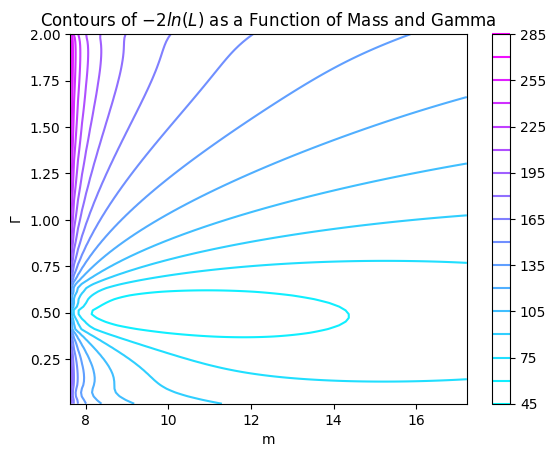

In [24]:
mGrid,gGrid = np.meshgrid(massRange,gammaRange)
plt.contour(mGrid,gGrid,nllRange,20,cmap = 'cool')
plt.xlabel('m')
plt.ylabel('$\Gamma$')
plt.title('Contours of $-2ln(L)$ as a Function of Mass and Gamma')
plt.colorbar()
plt.plot()

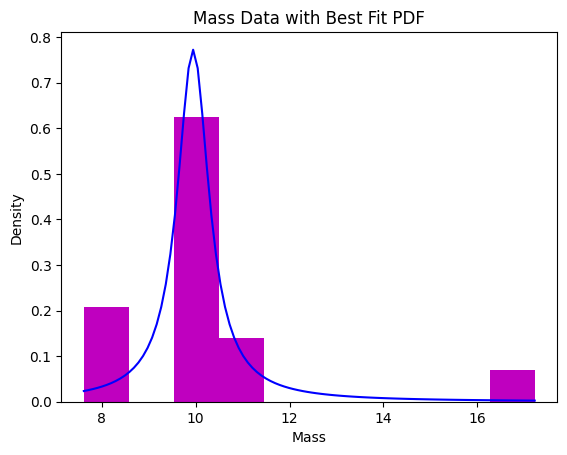

In [28]:
plt.hist(mass,color = 'm',density = True)
plt.plot(massRange,1 / (np.pi * minGamma * (1 + ((massRange - minM) / minGamma) ** 2)),color = 'b')
plt.xlabel('Mass')
plt.ylabel('Density')
plt.title('Mass Data with Best Fit PDF')
plt.show()

## Bonus

(I felt like doing this instead of $\chi ^2$, and they're the same number of points)

In [30]:
xr = (np.min(mass),np.max(mass)) #x range
n,xe = np.histogram(mass,range = xr) #finding horizontal (xe) and vertical (n) values for histogram
cx = 0.5 * (xe[1:] + xe[:-1]) #calculating center of bins

In [42]:
def cdf(xe,x,g):
    return cauchy.cdf((xe - x) / g) #cdf of x = (x_true - x_test) / gamma_test

In [44]:
c = cost.BinnedNLL(n,xe,cdf) #finding best likelihood fit results for a, b, and x_0 as described in the tutorial
m = Minuit(c,x = 10,g = 0.4) #initial guesses close to calculated minimizing values
m.limits['x'] = (np.min(mass),np.max(mass)) #limit based on data values
m.limits['g'] = (0.2,1) #limit based on knowledge of calculated gamma
m.migrad()

┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = 18.28 (χ²/ndof = 2.3)      │              Nfcn = 31               │
│ EDM = 1.55e-06 (Goal: 0.0002)    │                                      │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │   Below EDM threshold (goal x 10)    │
├──────────────────────────────────┼──────────────────────────────────────┤
│      No parameters at limit      │           Below call limit           │
├──────────────────────────────────┼──────────────────────────────────────┤
│             Hesse ok             │         Covariance accurate          │
└──────────────────────────────────┴──────────────────────────────────────┘
┌───┬──────┬───────────┬───────────┬────────────┬────────────┬─────────┬─────────┬───────┐
│   │ Name │   Value   │ Hesse Err │ Minos Err- │ Minos Err+ │ Limit-  │ Limit+  │ Fixed │
├───┼──────┼───────────┼───────────┼────────────┼────────────┼─────────┼─────────┼───────┤
│ 0 │ x    │   10.08   │   0.22    │            │            │ 7.62086 │ 17.2193 │       │
│ 1 │ g    │   0.38    │   0.16    │            │            │   0.2   │    1    │       │
└───┴──────┴───────────┴───────────┴────────────┴────────────┴─────────┴─────────┴───────┘
┌───┬───────────────┐
│   │      x      g │
├───┼───────────────┤
│ x │ 0.0475 -0.007 │
│ g │ -0.007 0.0271 │
└───┴───────────────┘

The values from iminuit are very close to our calculated values, as x = 10.08 compared to our calculated 9.95, and $\Gamma$ = 0.38 compared to our calculated 0.41.